# feature selection by Lasso Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import os 
os.chdir(r"C:\Users\amb\Downloads")

In [2]:
boston = pd.read_csv('HousingData.csv')
#boston.head()
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [9]:
#boston.isna()   # true or false for all column
#boston['ZN'].isnull().values.any()   # true or false for one column
#boston['PTRATIO'].isnull().sum()  # بتعد في كام قيمه مفقوده 
#boston.isnull().values.any()
#boston.isnull().tail()
#boston.notnull().tail()
boston.isnull().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
boston.shape

(506, 14)

In [10]:
fill_nan = boston['CRIM'].fillna(value=0,inplace = True)
fill_nan = boston['ZN'].fillna(value=0 ,inplace = True)
fill_nan = boston['INDUS'].fillna(value= 0,inplace = True)
fill_nan = boston['CHAS'].fillna(value= 0,inplace = True)
fill_nan = boston['AGE'].fillna(value= 0,inplace = True)
fill_nan = boston['LSTAT'].fillna(value= 0 ,inplace = True)


In [6]:
X = boston.drop('MEDV', axis = 1).values
y = boston['MEDV'].values

In [7]:
names = boston.columns.drop('MEDV')
print(names)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [8]:
len(names)

13

In [9]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X,y)

Lasso(alpha=0.1)

In [10]:
coeff = lasso.coef_
coeff

array([-0.10827023,  0.0484652 , -0.05798282,  1.41597717, -0.        ,
        4.26006424, -0.02141141, -1.10335645,  0.24850677, -0.01418573,
       -0.79946215,  0.01034894, -0.43173415])

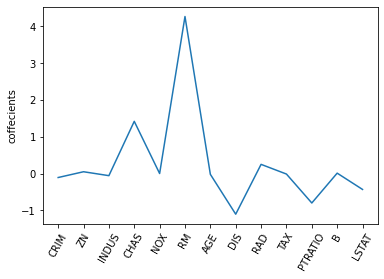

In [11]:
plt.plot(range(len(names)),coeff)
plt.xticks(range(len(names)),names,rotation = 60)  # حجزت 13 مكان ل 13 اسم دوران الكلمه 60
plt.ylabel('coffecients')
plt.show()

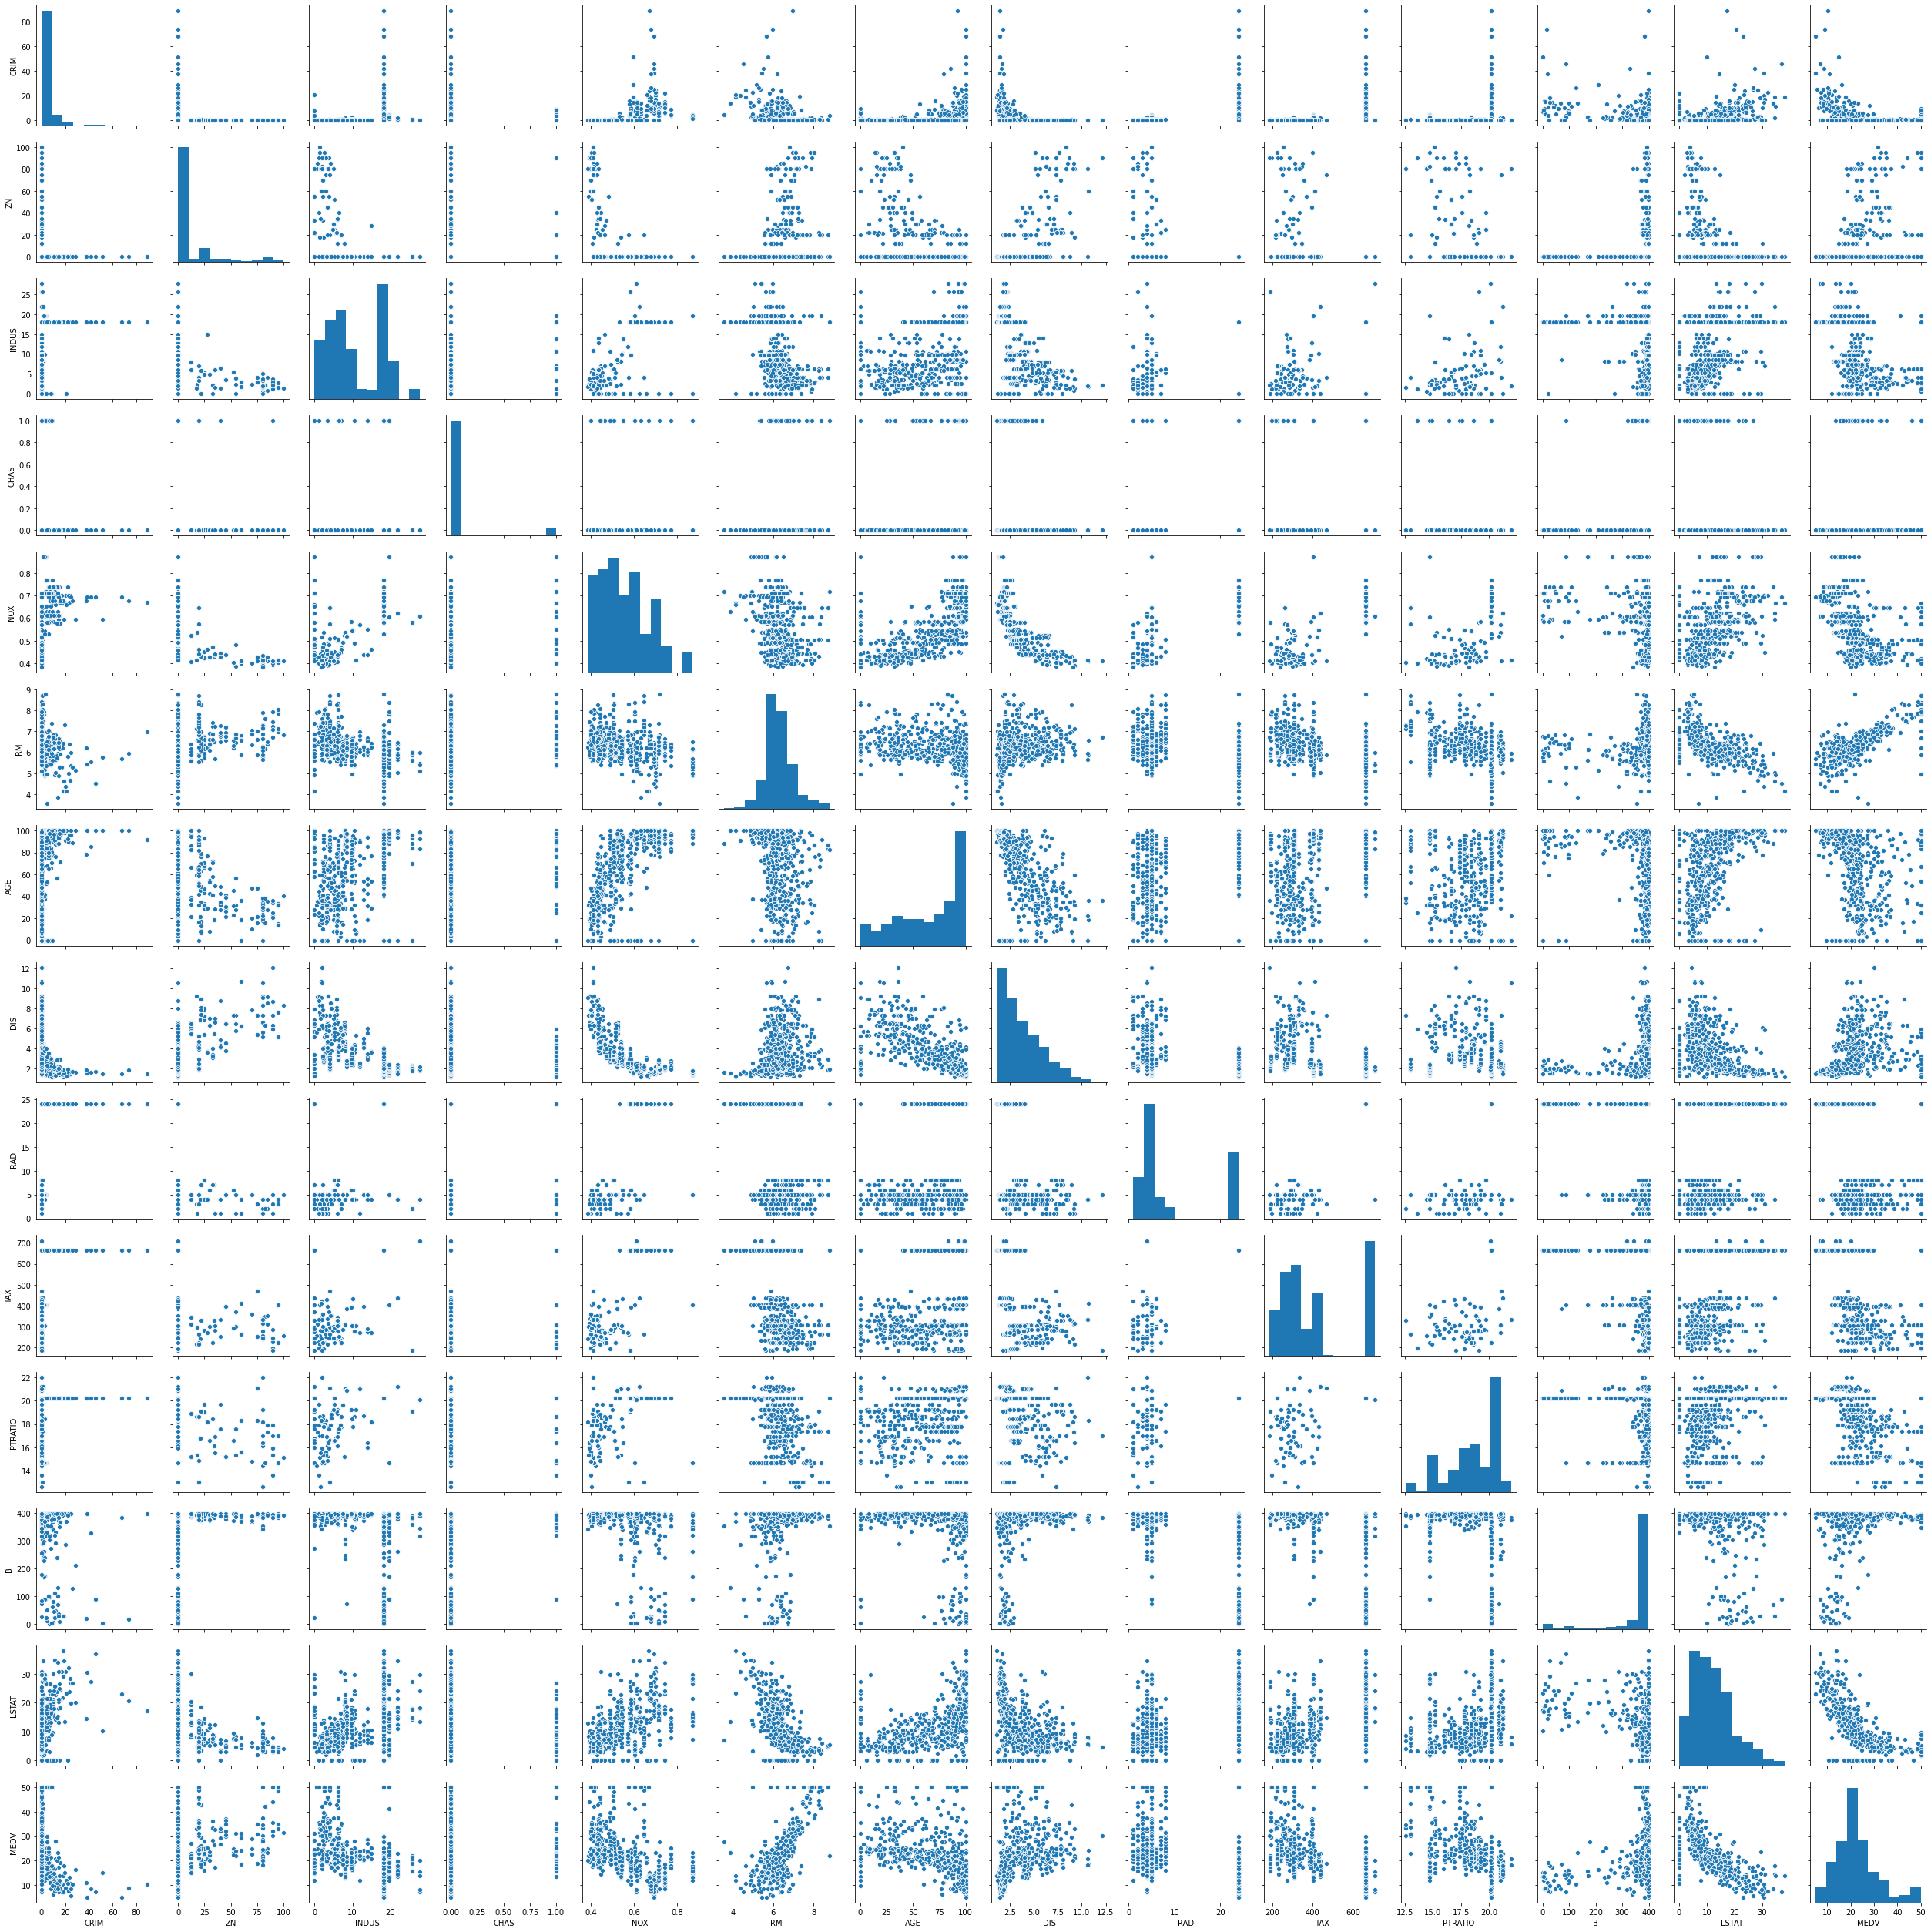

In [14]:
import seaborn as sns
sns.pairplot(boston)

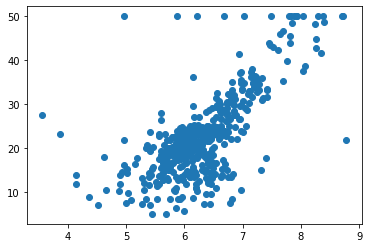

In [17]:
plt.scatter(boston["RM"],boston["MEDV"])